# Salary Prediction Model
This model uses Years of experience, Test score and Interview Score as an input parameter to predict the salary of an individual.

# Data Import

In [61]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics 

In [66]:
# import data
dataset = pd.read_csv('hiring.csv')
dataset.head(n=12)

,experience,test_score,interview_score,salary
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


# Data Cleaning and Exploration

In [40]:

# get information about data
dataset.info()

#   Output  #
#   <class 'pandas.core.frame.DataFrame'>
#   RangeIndex: 8 entries, 0 to 7
#   Data columns (total 4 columns):
#   #   Column           Non-Null Count  Dtype  
#   ---  ------           --------------  -----  
#   0   experience       6 non-null      object 
#   1   test_score       7 non-null      float64
#   2   interview_score  8 non-null      int64  
#   3   salary           8 non-null      int64 
#   #

# check null values
print(dataset.isnull().sum())
#   Output  #
#   experience         2
#   test_score         1
#   interview_score    0
#   salary             0
#   #

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   experience       6 non-null      object 
 1   test_score       7 non-null      float64
 2   interview_score  8 non-null      int64  
 3   salary           8 non-null      int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 384.0+ bytes
experience         2
test_score         1
interview_score    0
salary             0
dtype: int64


Filling Nulls

In [41]:
#fill experience null values with 0
dataset['experience'].fillna(0, inplace=True)

#fill test score null value with mean
dataset['test_score'].fillna(dataset['test_score'].mean(), inplace=True)

Dataset contains only 8 samples. Hence removing rows with null value is not a good idea in this case. Converting categorical feature to numeric

In [42]:
#convert categorical value to numeric
def convert_to_numeric(word):
    word_dict = {'one':1, 'two':2, 'three':3, 'four':4, 'five':5, 'six':6, 'seven':7, 'eight':8,
                'nine':9, 'ten':10, 'eleven':11, 'twelve':12, 'zero':0, 0: 0}
    return word_dict[word]

dataset['experience'] = dataset['experience'].apply(lambda x : convert_to_numeric(x))

In [43]:
# check null values
print(dataset.isnull().sum())
#   Output  #
#   experience         0
#   test_score         0
#   interview_score    0
#   salary             0
#   #

experience         0
test_score         0
interview_score    0
salary             0
dtype: int64


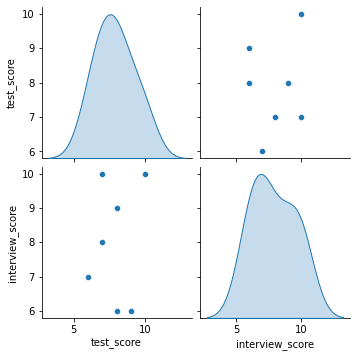

In [69]:
#pairplot to see how different columns are related and how their distribution looks like
sns.pairplot(dataset[['test_score','interview_score']] , diag_kind="kde");

# Model building


In [51]:
#Cretae input feature
X = dataset.iloc[:, :3]
#target feature
y = dataset.iloc[:,-1]

In [52]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

# feature scaling is not done because model features are in same range but it is a good practice to do it

In [56]:
# model training
regressor = LinearRegression()

# Fitting model with trainig data
regressor.fit(X_train, y_train)

LinearRegression()

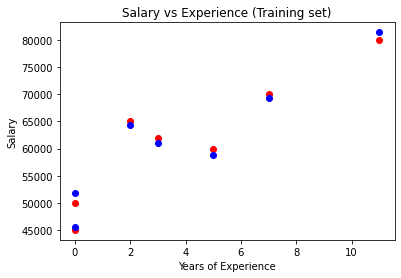

In [59]:
# Visualising the Training set results
plt.scatter(X_train['experience'], y_train, color = 'red')
plt.scatter(X_train['experience'], regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()


In [64]:
y_pred = regressor.predict(X_test)
b0 = regressor.intercept_
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred)) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

#   Output  #
#   Mean Absolute Error: 6136.26465724314
#   Mean Squared Error: 37653743.94373128
#   Root Mean Squared Error: 6136.26465724314
#   #

Mean Absolute Error: 6136.26465724314
Mean Squared Error: 37653743.94373128
Root Mean Squared Error: 6136.26465724314


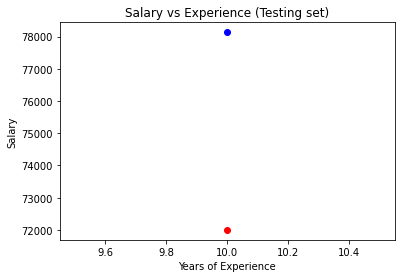

In [65]:
# Visualising the test set results
plt.scatter(X_test['experience'], y_test, color = 'red')
plt.scatter(X_test['experience'], regressor.predict(X_test), color = 'blue')
plt.title('Salary vs Experience (Testing set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [ ]:
# Saving model to disk
pickle.dump(regressor, open("model.pkl", "wb"))

In [ ]:
# Loading model to compare the results
model = pickle.load(open("model.pkl", "rb"))
print(model.predict([[10, 7, 6]]))